# Plot Benchmark Results

This notebook is for visualizing benchmark metric plots.

In [1]:
import os
from cuchembench.plot import (load_benchmark_files, \
                              make_multimodel_sampling_plots, \
                              make_multimodel_similarity_search_plot, \
                              make_multimodel_physchem_plots, \
                              make_multimodel_bioactivity_plots,
                              make_correlation_plots)

## Setup / Config

In [2]:
base_metric_path = '../../data/benchmark_output/benchmark_data_rajesh'

metric_paths = [os.path.join(base_metric_path, 'nemo_20220714'),
                os.path.join(base_metric_path, 'nemo_20220720')]

exp_name_list = ['MegaMolBARTv0.2 (2022/07/14)', 'MegaMolBARTv0.2 (2022/07/20)'] # experiment names, should be same length as metric_paths

reports_dir = '/data/benchmark_output/reports_test'
save_plots = False # Only show in notebook

os.makedirs(reports_dir, exist_ok=True)

## Sampling: Validity, Novelty, Uniqueness

/workspace/benchmark/cuchembench/plot/sample.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_df.loc[:, comparison_field] = plt_df[comparison_field].astype(exp_sort_order)


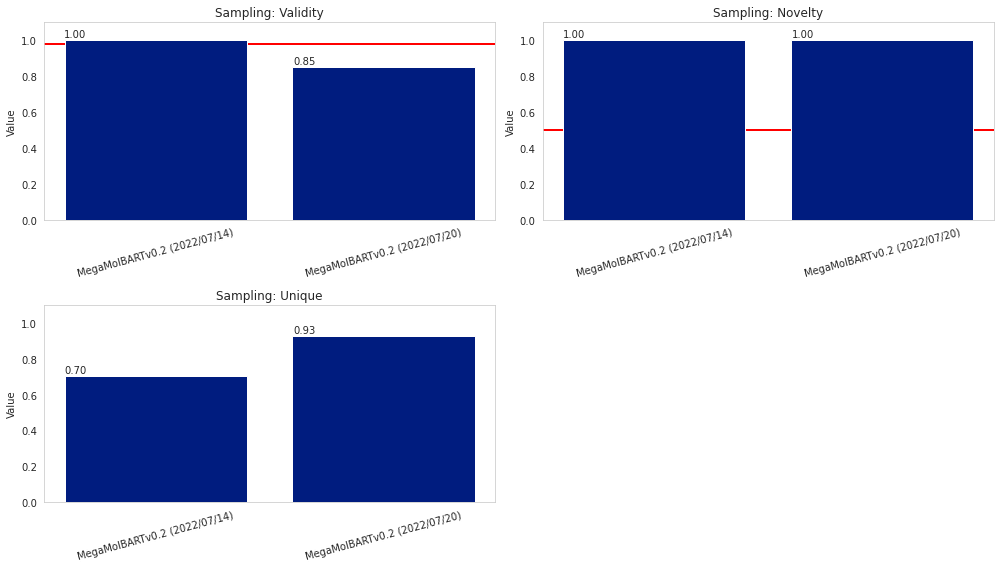

In [3]:
df = load_benchmark_files(metric_paths=metric_paths, exp_name_list=exp_name_list, parse_timestamps=False)

acceptance_criteria = {'validity': 0.98, 'novelty': 0.50}
_ = make_multimodel_sampling_plots(df=df, acceptance_criteria=acceptance_criteria, save_plots=save_plots, reports_dir=reports_dir)

## Embedding: Similarity Search

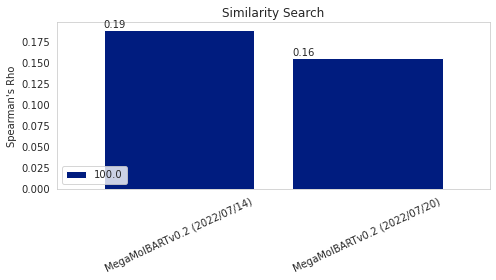

In [4]:
df = load_benchmark_files(metric_paths=metric_paths, exp_name_list=exp_name_list, parse_timestamps=False)

# Limit to only top k = 100
radii_query_str = 'top_k == 100.0'
df_input = df.query(radii_query_str)

make_multimodel_similarity_search_plot(df=df_input, save_plots=save_plots, reports_dir=reports_dir)

## Embedding: Physchem

INFO:root:exp_name                      model                 
MegaMolBARTv0.2 (2022/07/14)  linear_regression         1.445670
                              random_forest             1.274344
                              support_vector_machine    2.349112
MegaMolBARTv0.2 (2022/07/20)  linear_regression         1.302578
                              random_forest             1.635291
                              support_vector_machine    2.664364
Name: value, dtype: float64
INFO:root:Dataframe for logD contains duplicate values. They will be averaged.


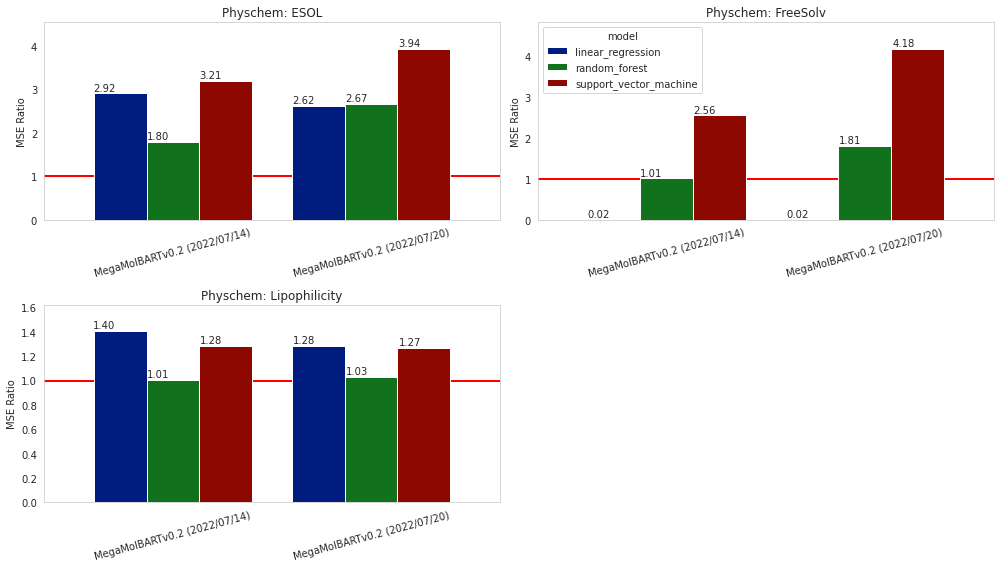

In [5]:
df = load_benchmark_files(metric_paths=metric_paths, exp_name_list=exp_name_list, parse_timestamps=False)
_ = make_multimodel_physchem_plots(df=df, save_plots=save_plots, reports_dir=reports_dir)

## Embedding: Bioactivity

INFO:root:The genes being plotted have been limited to ['ABL1', 'ACHE', 'ADAM17', 'ADORA2A', 'ADORA2B', 'ADORA3', 'ADRA1A', 'ADRA1D', 'ADRB1', 'ADRB2', 'ADRB3', 'AKT1', 'AKT2', 'ALK', 'ALOX5', 'AR', 'AURKA', 'AURKB', 'BACE1', 'CA1', 'CA12', 'CA2', 'CA9', 'CASP1', 'CCKBR', 'CCR2', 'CCR5', 'CDK1']
INFO:root:linear_regression
INFO:root:exp_name
MegaMolBARTv0.2 (2022/07/14)    0.825466
MegaMolBARTv0.2 (2022/07/20)    0.873791
Name: value, dtype: float64
INFO:root:support_vector_machine
INFO:root:exp_name
MegaMolBARTv0.2 (2022/07/14)    0.811882
MegaMolBARTv0.2 (2022/07/20)    0.843153
Name: value, dtype: float64
INFO:root:random_forest
INFO:root:exp_name
MegaMolBARTv0.2 (2022/07/14)    0.680122
MegaMolBARTv0.2 (2022/07/20)    0.696623
Name: value, dtype: float64


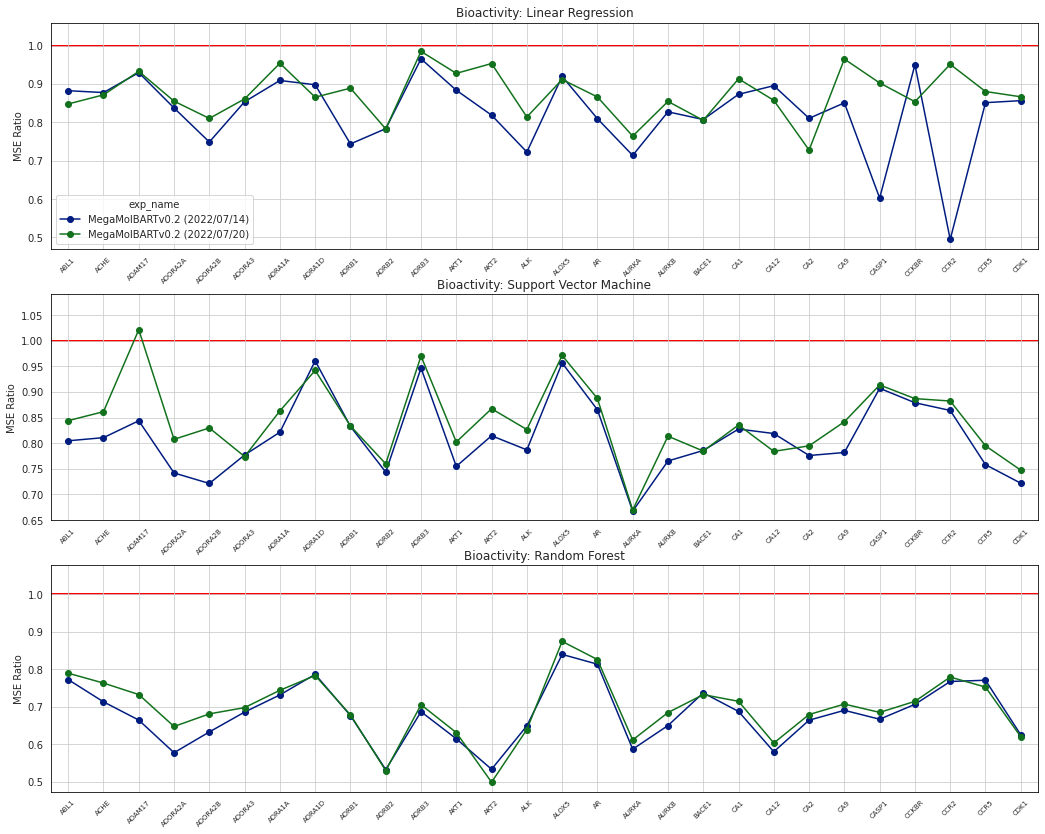

In [6]:
df = load_benchmark_files(metric_paths=metric_paths, exp_name_list=exp_name_list, parse_timestamps=False)
_ = make_multimodel_bioactivity_plots(df=df, 
                                  limit_genes=28, # limit to the first 28 genes, can also provide a list of genes or set to None
                                  save_plots=False, 
                                  reports_dir=reports_dir)

## Physchem Diagnostic Charts

INFO:cuchembench.datasets.base:Loading data from /workspace/benchmark/cuchembench/csv_data/benchmark_MoleculeNet_ESOL.csv
INFO:cuchembench.datasets.base:Fingerprints file /workspace/benchmark/cuchembench/csv_data/fingerprints_MoleculeNet_ESOL_512.csv exists. Checking if indexes match data.
INFO:cuchembench.datasets.base:Indexes in data are all contained in fingerprints file /workspace/benchmark/cuchembench/csv_data/fingerprints_MoleculeNet_ESOL_512.csv. Using existing file.
INFO:cuchembench.datasets.base:Loading fingerprints from /workspace/benchmark/cuchembench/csv_data/fingerprints_MoleculeNet_ESOL_512.csv
INFO:cuchembench.datasets.base:Loading data from /workspace/benchmark/cuchembench/csv_data/benchmark_MoleculeNet_FreeSolv.csv
INFO:cuchembench.datasets.base:Fingerprints file /workspace/benchmark/cuchembench/csv_data/fingerprints_MoleculeNet_FreeSolv_512.csv exists. Checking if indexes match data.
INFO:cuchembench.datasets.base:Indexes in data are all contained in fingerprints file

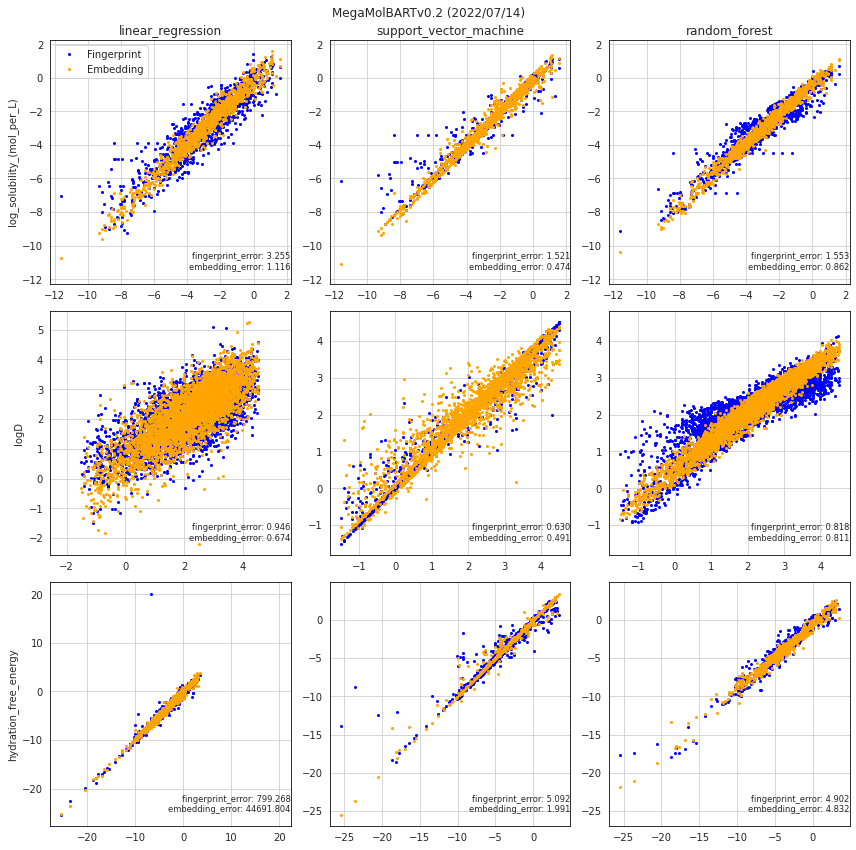

In [7]:
df = load_benchmark_files(metric_paths=metric_paths, exp_name_list=exp_name_list, file_type='pkl') # Need pkl data for correlation plots


exp_name = 'MegaMolBARTv0.2 (2022/07/14)' # uses only one experiment's worth of data
max_seq_len = 512
num_rows_per_page = 2


make_correlation_plots(df, exp_name=exp_name,
                       max_seq_len=max_seq_len, plot_type='physchem', 
                       reports_dir=reports_dir, 
                       num_rows_per_page=3)

## Bioactivity Diagnostic Charts

INFO:cuchembench.datasets.base:Loading data from /workspace/benchmark/cuchembench/csv_data/benchmark_ExCAPE_Bioactivity.csv
INFO:cuchembench.datasets.base:Fingerprints file /workspace/benchmark/cuchembench/csv_data/fingerprints_ExCAPE_Bioactivity.csv exists. Checking if indexes match data.
INFO:cuchembench.datasets.base:Indexes in data are all contained in fingerprints file /workspace/benchmark/cuchembench/csv_data/fingerprints_ExCAPE_Bioactivity.csv. Using existing file.
INFO:cuchembench.datasets.base:Loading fingerprints from /workspace/benchmark/cuchembench/csv_data/fingerprints_ExCAPE_Bioactivity.csv
INFO:root:The genes being plotted have been limited to ['ABL1', 'ACHE', 'ADAM17', 'ADORA2A']


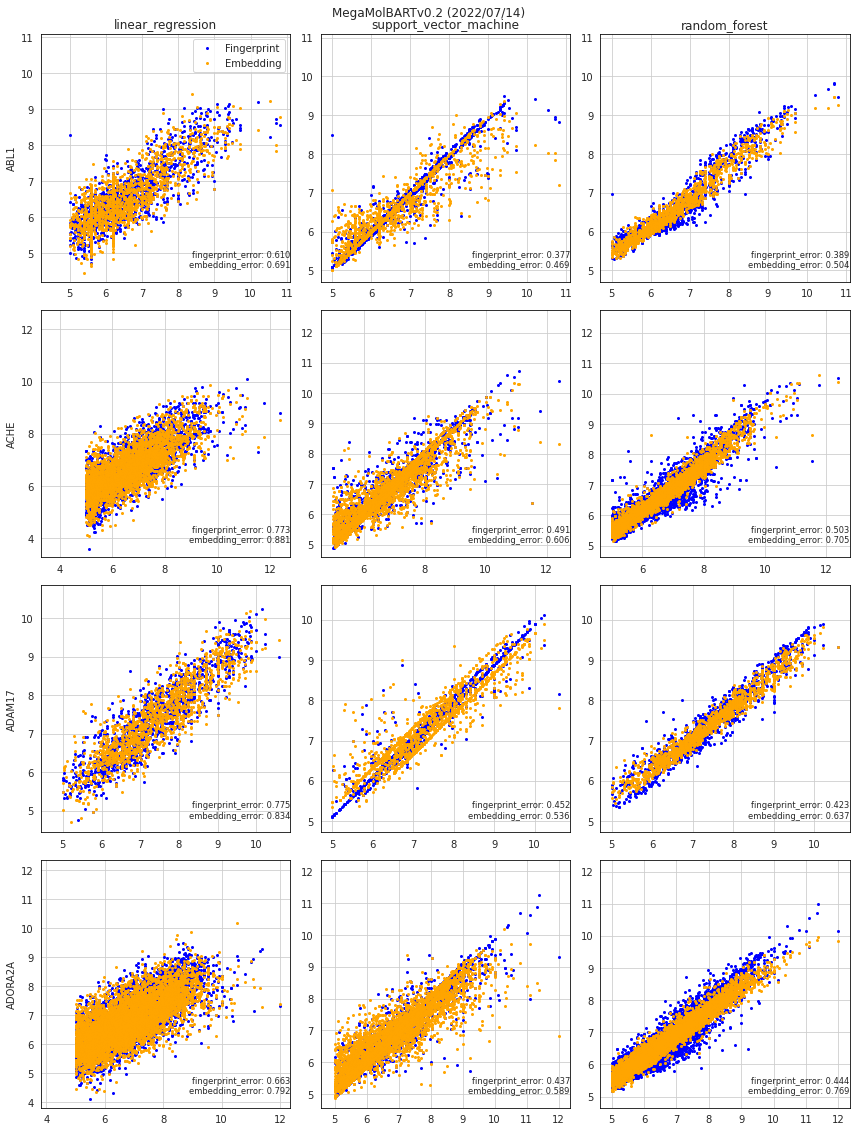

In [8]:
df = load_benchmark_files(metric_paths=metric_paths, exp_name_list=exp_name_list, file_type='pkl') # Need pkl data for correlation plots


exp_name = 'MegaMolBARTv0.2 (2022/07/14)' # uses only one experiment's worth of data
max_seq_len = 512
num_rows_per_page = 2

make_correlation_plots(df, 
                       exp_name=exp_name,
                       max_seq_len=max_seq_len, 
                       plot_type='bioactivity', 
                       reports_dir=reports_dir, 
                       num_rows_per_page=4, 
                       limit_genes=4) # Limit to the first 4 genes, can also provide a list of genes or set to None for all
